In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
data_prefix = '/data/analysis/ag-reils/ag-reils-shared/Hi-C/'

In [4]:
chromosome_names = ["chr10", "chr11", "chr12", "chr13", "chr14", "chr15", "chr16", "chr17", "chr18", "chr19", "chr1", "chr20", "chr21", "chr22", "chr2", "chr3", "chr4", "chr5", "chr6", "chr7", "chr8", "chr9"]

In [5]:
path_list_dict = {}
path = f"{data_prefix}meeteu/www.lcqb.upmc.fr/meetu/dataforstudent/HiC/GM12878/100kb_resolution_intrachromosomal/"

# Dictionary with the path to each chromosom
for chromosome_name in chromosome_names:
    path_list_dict[chromosome_name] = list(Path(path).rglob(chromosome_name + "_100kb.RAWobserved"))

In [6]:
###############################################################################################################################
chromosome = "chr7"
chromosome_short = "7"
chromosome_number = 7
###############################################################################################################################

In [7]:
lines = []

for file in path_list_dict[chromosome]:
    with open(file,'r') as f:
        lines_sub = f.read().splitlines()
    lines = lines + lines_sub
    f.close()

In [8]:
data = [i.split('\t') for i in lines]
z = list(zip(*data))
row_indices = np.array(list(map(int,z[0])))

In [9]:
scaling_factor = np.min(row_indices[np.nonzero(row_indices)])
scaling_factor

100000

In [10]:
row_indices = row_indices/scaling_factor
row_indices = row_indices.astype(int)
row_indices

array([   0,    0,    1, ..., 1589, 1590, 1591])

In [11]:
column_indices = np.array(list(map(int,z[1])))
column_indices

array([        0,    100000,    100000, ..., 159100000, 159100000,
       159100000])

In [12]:
column_indices = column_indices/scaling_factor
column_indices = column_indices.astype(int)
column_indices

array([   0,    1,    1, ..., 1591, 1591, 1591])

In [13]:
values = list(map(float,z[2]))


In [14]:
A = np.zeros((max(row_indices)+1,max(column_indices)+1))

In [15]:
A[row_indices,column_indices]=values

In [16]:
A_flatten = A.flatten()
A_flatten = np.array(A_flatten)
A_flatten = A_flatten[A_flatten != 0]
A_flatten

array([17873.,  7062.,  1082., ..., 22507.,  2005.,  4772.])

In [23]:
for upper_quantile in np.arange(0, 1.1, 0.1):
    print(np.quantile(A_flatten, upper_quantile))

1.0
4.0
7.0
9.0
12.0
17.0
23.0
34.0
49.0
83.0
77857.0


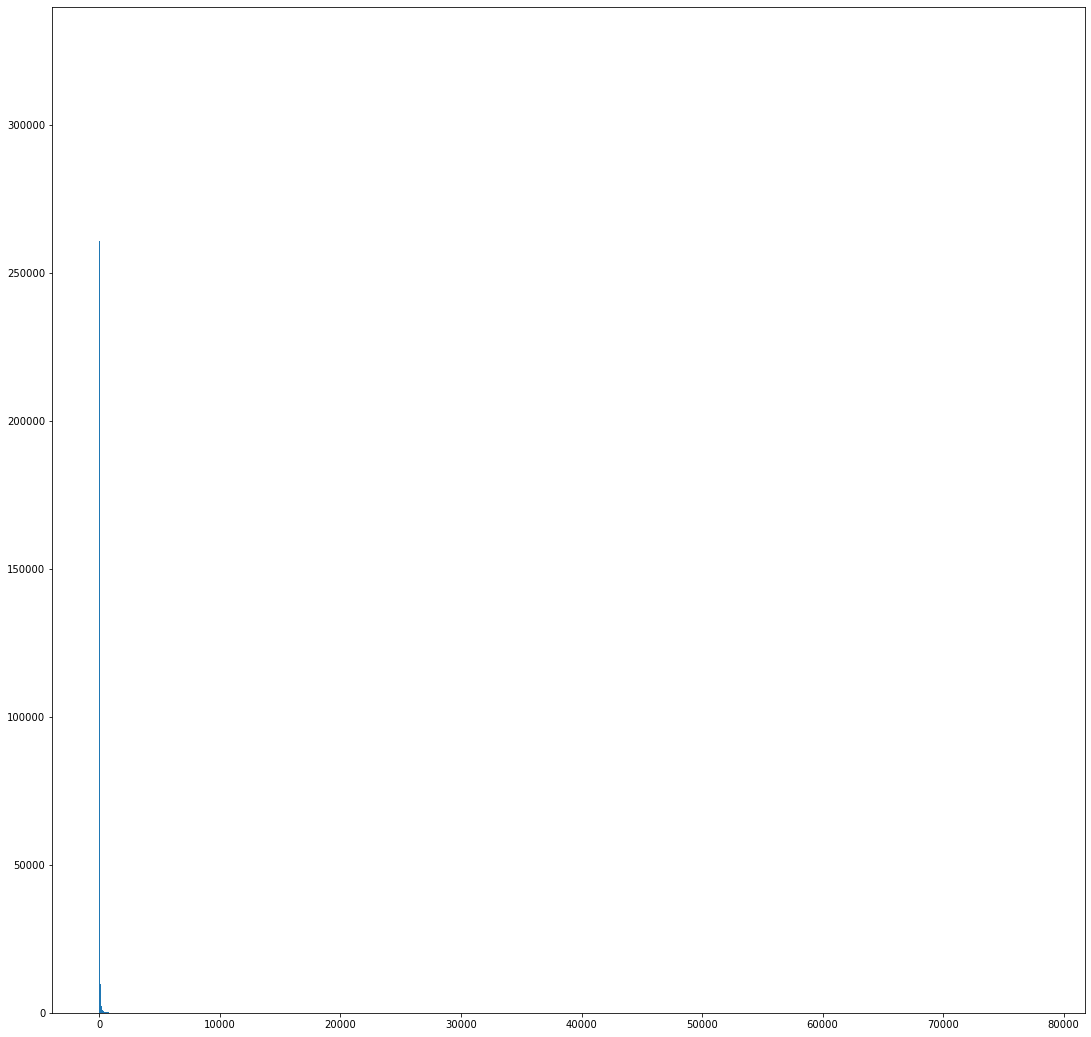

In [18]:
plt.hist(A_flatten, bins=10000)
plt.gcf().set_size_inches(18.5, 18.5)
# plt.show()
plt.savefig('./images/histogram_bins.png', dpi=300)

In [24]:
distribution_sum_row = []

for row in A:
    distribution_sum_row.append(sum(row))

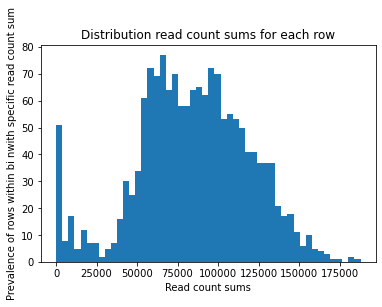

In [25]:
plt.title("Distribution read count sums for each row")
plt.xlabel("Read count sums")
plt.ylabel("Prevalence of rows within bi nwith specific read count sum")
plt.hist(distribution_sum_row, bins=50)
plt.show()

# Basic statistics about counts

In [26]:
df_solution = pd.read_csv(f"{data_prefix}meeteu/www.lcqb.upmc.fr/meetu/dataforstudent/TAD/GSE63525_GM12878_primary+replicate_Arrowhead_domainlist.txt", delimiter="\t")
df_solution.head(10)

,chr1,x1,x2,chr2,y1,y2,color,f1,f2,f3,f4,f5
0,1,144835000,145835000,1,144835000,145835000,"255,255,0",0.55170,0.35009,0.26860,0.43080,0.53910
1,1,68985000,70260000,1,68985000,70260000,"255,255,0",0.34374,0.27084,0.29571,0.40022,0.50935
2,1,49365000,50810000,1,49365000,50810000,"255,255,0",1.05670,0.24008,0.24148,0.49497,0.68434
3,1,163360000,164895000,1,163360000,164895000,"255,255,0",1.15700,0.21904,0.24336,0.71738,0.60165
4,1,247800000,248395000,1,247800000,248395000,"255,255,0",0.33524,0.18309,0.27343,0.40819,0.40678
5,1,196075000,196660000,1,196075000,196660000,"255,255,0",0.58233,0.18231,0.23668,0.42402,0.51666
6,1,3995000,5510000,1,3995000,5510000,"255,255,0",1.01090,0.21231,0.17448,0.59990,0.66212
7,1,79935000,80560000,1,79935000,80560000,"255,255,0",0.79723,0.17663,0.19267,0.44240,0.40041
8,1,176855000,177945000,1,176855000,177945000,"255,255,0",0.71081,0.18607,0.18148,0.42017,0.61687
9,1,60435000,61285000,1,60435000,61285000,"255,255,0",0.80311,0.18147,0.16872,0.76000,0.43903


In [27]:
df_solution = df_solution[(df_solution["chr1"] == chromosome_short) & (df_solution["chr2"] == chromosome_short)]
df_solution.head(10)

,chr1,x1,x2,chr2,y1,y2,color,f1,f2,f3,f4,f5
7800,7,62035000,62705000,7,62035000,62705000,"255,255,0",0.43243,0.36097,0.42327,0.48251,0.40299
7801,7,152585000,154270000,7,152585000,154270000,"255,255,0",0.65448,0.34566,0.36822,0.62123,0.47925
7802,7,152580000,154570000,7,152580000,154570000,"255,255,0",0.56197,0.38705,0.31042,0.56112,0.48736
7803,7,63325000,64365000,7,63325000,64365000,"255,255,0",0.45404,0.39899,0.28934,0.45026,0.42104
7804,7,48310000,49960000,7,48310000,49960000,"255,255,0",0.46883,0.30645,0.32040,0.43346,0.47783
7805,7,135730000,137285000,7,135730000,137285000,"255,255,0",0.25662,0.30885,0.28486,0.40066,0.44194
7806,7,50130000,50520000,7,50130000,50520000,"255,255,0",1.01280,0.35169,0.20162,0.65089,0.68836
7807,7,83565000,84655000,7,83565000,84655000,"255,255,0",0.38795,0.26470,0.27709,0.50080,0.40173
7808,7,15230000,16120000,7,15230000,16120000,"255,255,0",0.54417,0.24196,0.23757,0.44275,0.40008
7809,7,70295000,71990000,7,70295000,71990000,"255,255,0",1.26260,0.17568,0.25914,0.79488,0.66175


In [28]:
df_solution["x1"] = df_solution["x1"].apply(lambda x: np.int(round(x/scaling_factor, 0)))
df_solution["x2"] = df_solution["x2"].apply(lambda x: np.int(round(x/scaling_factor, 0)))

In [29]:
df_solution.head(10)

,chr1,x1,x2,chr2,y1,y2,color,f1,f2,f3,f4,f5
7800,7,620,627,7,62035000,62705000,"255,255,0",0.43243,0.36097,0.42327,0.48251,0.40299
7801,7,1526,1543,7,152585000,154270000,"255,255,0",0.65448,0.34566,0.36822,0.62123,0.47925
7802,7,1526,1546,7,152580000,154570000,"255,255,0",0.56197,0.38705,0.31042,0.56112,0.48736
7803,7,633,644,7,63325000,64365000,"255,255,0",0.45404,0.39899,0.28934,0.45026,0.42104
7804,7,483,500,7,48310000,49960000,"255,255,0",0.46883,0.30645,0.32040,0.43346,0.47783
7805,7,1357,1373,7,135730000,137285000,"255,255,0",0.25662,0.30885,0.28486,0.40066,0.44194
7806,7,501,505,7,50130000,50520000,"255,255,0",1.01280,0.35169,0.20162,0.65089,0.68836
7807,7,836,847,7,83565000,84655000,"255,255,0",0.38795,0.26470,0.27709,0.50080,0.40173
7808,7,152,161,7,15230000,16120000,"255,255,0",0.54417,0.24196,0.23757,0.44275,0.40008
7809,7,703,720,7,70295000,71990000,"255,255,0",1.26260,0.17568,0.25914,0.79488,0.66175


In [30]:
df_solution_tuples = []

for index, row in df_solution.iterrows():
    df_solution_tuples.append((row["x1"], row["x2"]))
    df_solution_tuples.append((row["x2"], row["x1"]))


In [31]:
df_solution_nodes = []

for index, row in df_solution.iterrows():
    df_solution_nodes.append(row["x1"])
    df_solution_nodes.append(row["x2"])

# Solution TAD

## Graph Building & Network Visulization

In [46]:
data = A.copy()

In [47]:
G = nx.from_numpy_matrix(data)  

In [48]:
for node in G.nodes():
    print("##############")
    print(node)
    if node in df_solution_nodes:
        G.nodes[node]["label"] = "true"
        print("true_tad")
    else:
        G.nodes[node]["label"] = "false"

##############
0
##############
1
##############
2
##############
3
##############
4
##############
5
##############
6
true_tad
##############
7
##############
8
true_tad
##############
9
true_tad
##############
10
true_tad
##############
11
true_tad
##############
12
true_tad
##############
13
##############
14
##############
15
true_tad
##############
16
true_tad
##############
17
##############
18
##############
19
##############
20
##############
21
true_tad
##############
22
true_tad
##############
23
true_tad
##############
24
true_tad
##############
25
##############
26
true_tad
##############
27
true_tad
##############
28
true_tad
##############
29
true_tad
##############
30
##############
31
##############
32
true_tad
##############
33
##############
34
##############
35
##############
36
##############
37
##############
38
##############
39
##############
40
##############
41
##############
42
##############
43
##############
44
##############
45
##############
46
true_tad
##

484
##############
485
##############
486
##############
487
##############
488
##############
489
##############
490
##############
491
##############
492
##############
493
##############
494
##############
495
true_tad
##############
496
##############
497
##############
498
##############
499
true_tad
##############
500
true_tad
##############
501
true_tad
##############
502
##############
503
##############
504
##############
505
true_tad
##############
506
##############
507
##############
508
true_tad
##############
509
##############
510
##############
511
##############
512
##############
513
##############
514
##############
515
##############
516
##############
517
##############
518
##############
519
##############
520
##############
521
##############
522
##############
523
##############
524
##############
525
##############
526
##############
527
##############
528
##############
529
##############
530
##############
531
##############
532
##############
533
###########

##############
928
true_tad
##############
929
true_tad
##############
930
##############
931
##############
932
##############
933
##############
934
##############
935
true_tad
##############
936
##############
937
true_tad
##############
938
##############
939
true_tad
##############
940
##############
941
true_tad
##############
942
##############
943
true_tad
##############
944
##############
945
##############
946
##############
947
##############
948
##############
949
true_tad
##############
950
##############
951
true_tad
##############
952
true_tad
##############
953
true_tad
##############
954
##############
955
true_tad
##############
956
##############
957
##############
958
true_tad
##############
959
##############
960
true_tad
##############
961
##############
962
##############
963
##############
964
##############
965
##############
966
##############
967
true_tad
##############
968
true_tad
##############
969
##############
970
##############
971
##############
972
#

In [53]:
lower_threshold = 34
upper_threshold = 83

In [54]:
print(f"Before Edge-filtering: {len(G.edges)}")

for edge in G.edges():
    if G.edges[edge]["weight"] < lower_threshold:
        G.remove_edge(edge[0], edge[1])

print(f"After Edge-filtering: {len(G.edges)}")

Before Edge-filtering: 741866
After Edge-filtering: 356438


In [55]:
print(f"Before Node-filtering: {len(G.nodes)}")

for node in list(G.nodes()):
    if len(G.edges(node)) == 0:
        G.remove_node(node)

print(f"After Node-filtering: {len(G.nodes)}")

Before Node-filtering: 1554
After Node-filtering: 1553


## Visualization

### Hi-C Matrix

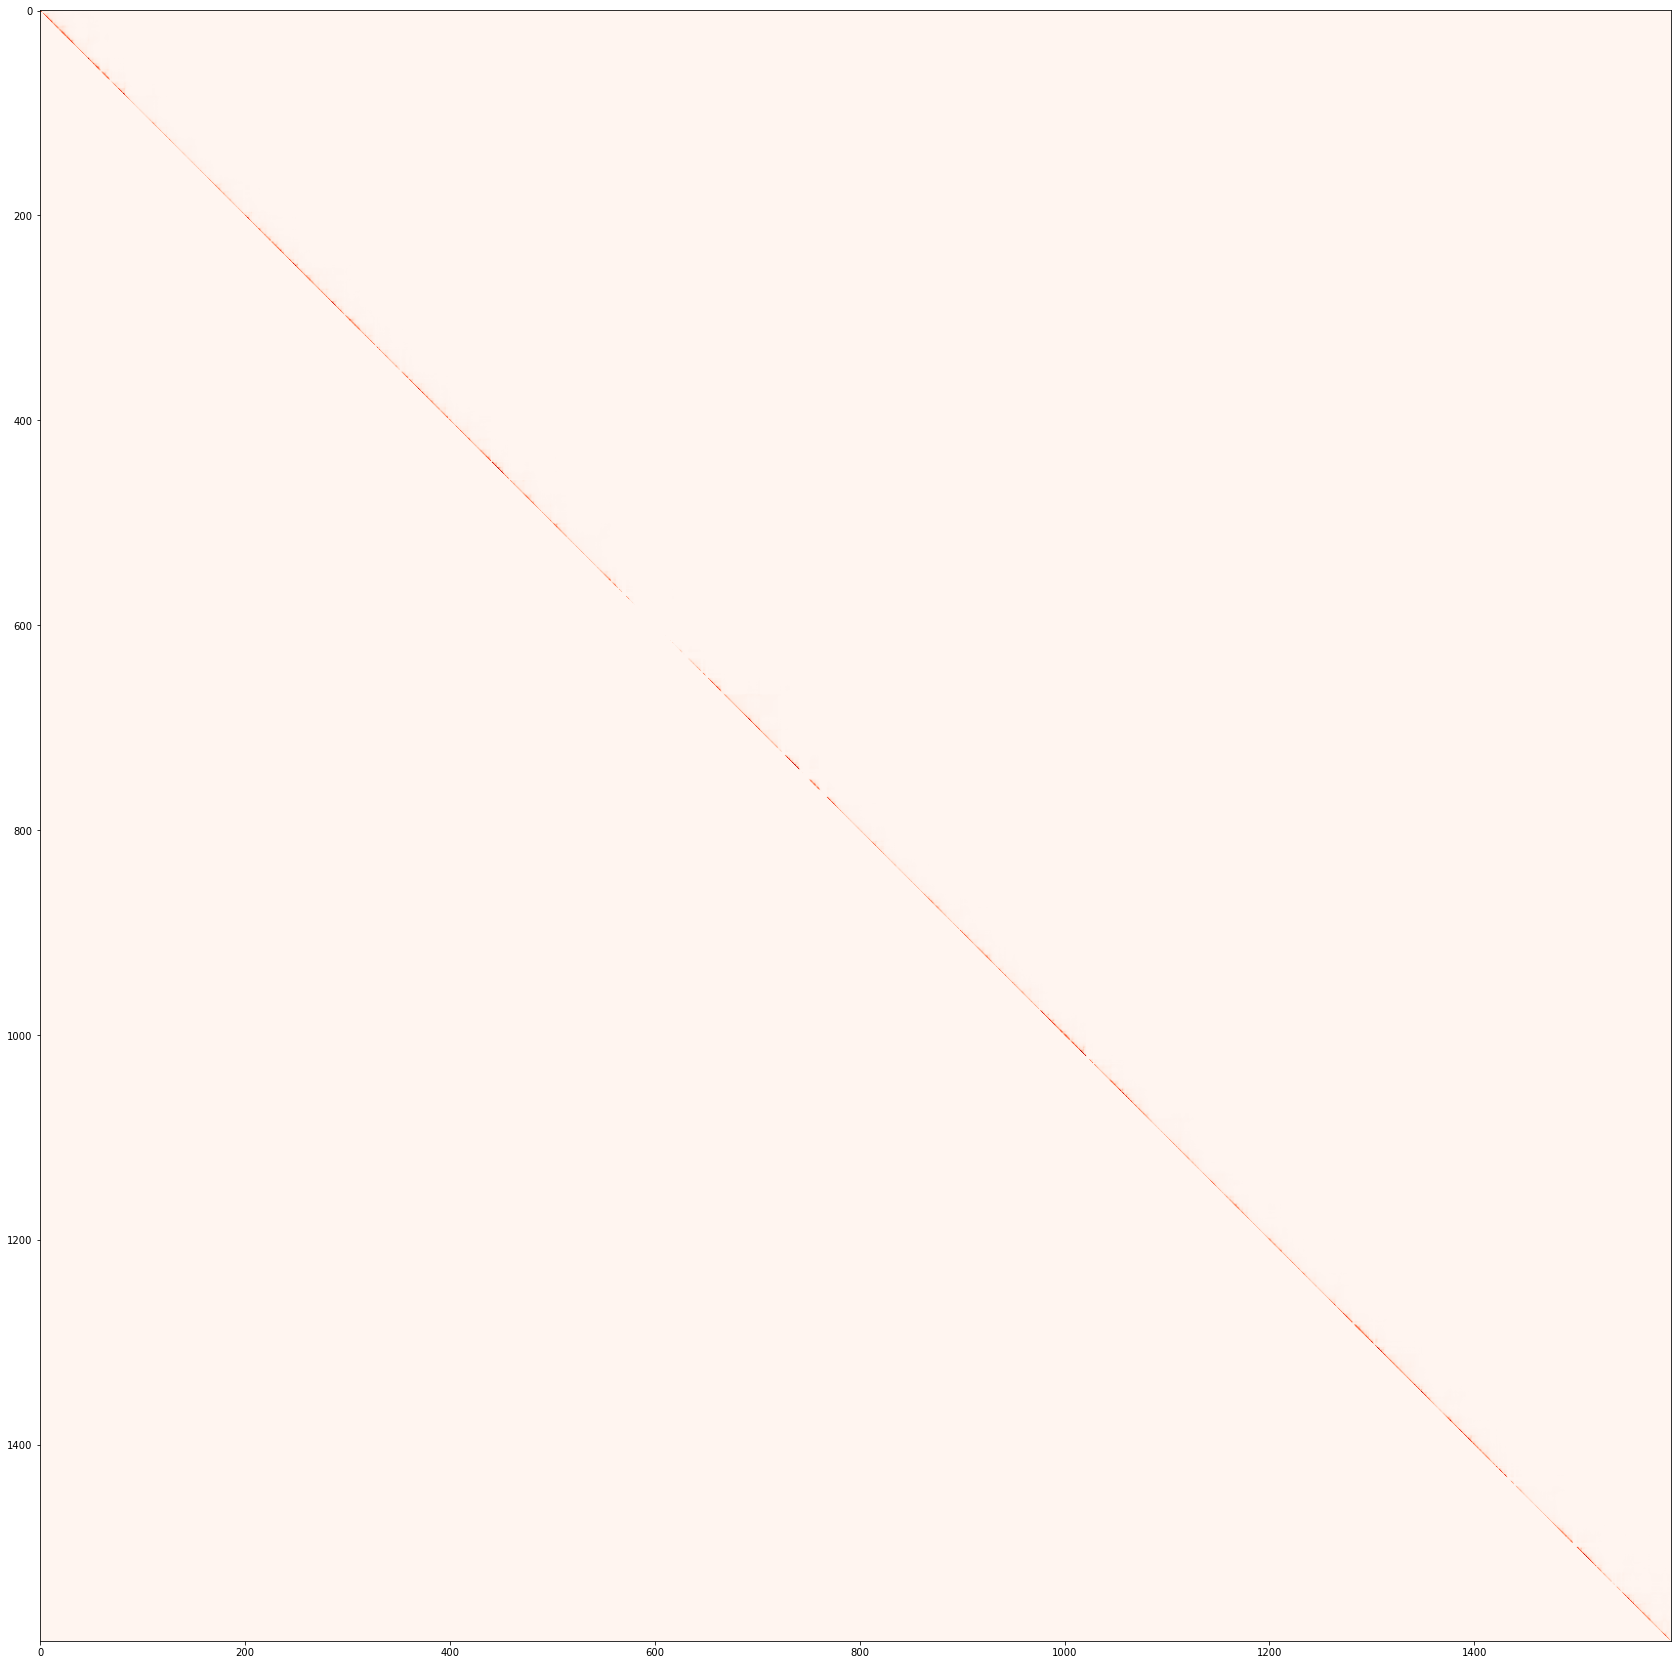

In [37]:
plt.imshow(data, cmap="Reds")
plt.gcf().set_size_inches(30, 30)
plt.show()

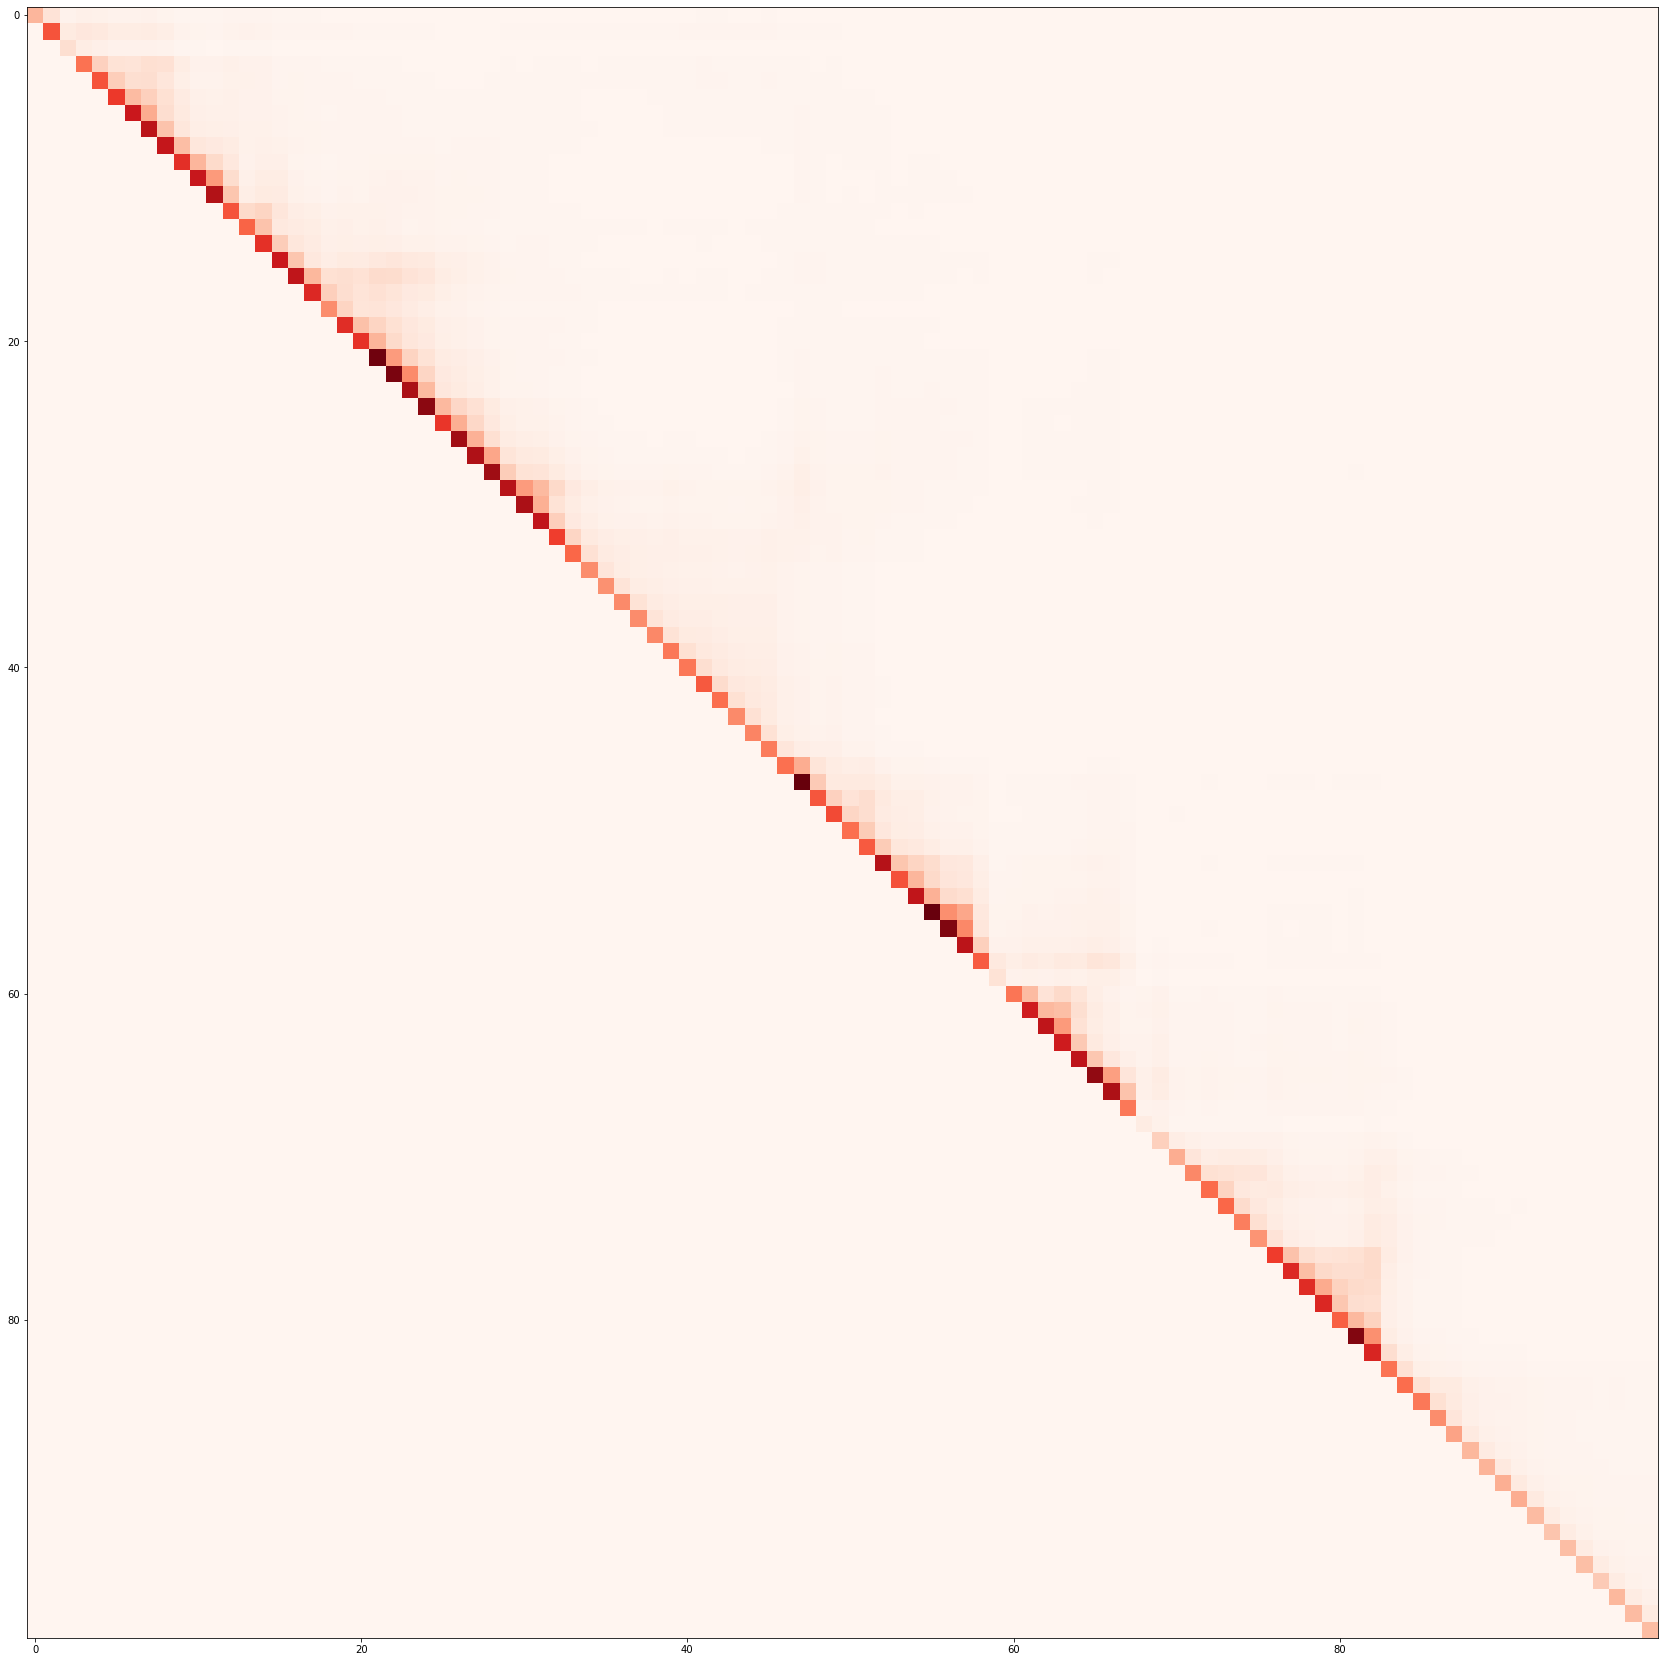

In [60]:
plt.imshow(data[0:100,0:100], cmap="Reds")
plt.gcf().set_size_inches(30, 30)
plt.show()

### Graphs

In [61]:
def graph_visualization(G, lower_threshold, upper_threshold):
    node_color = []

    for node in G.nodes(data=True):
        if node[1]['label'] == "true":
            node_color.append('blue')
        else:
            node_color.append('green')

    #node_color
    
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > upper_threshold]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= upper_threshold]

    pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=60, node_color=node_color)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=3)
    nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color="y", style="dashed")

    # labels
    #nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.gcf().set_size_inches(60, 60)
    plt.ssavefig(f'./images/graph_threshold{lower_threshold}-{upper_threshold}.png', dpi=300)
    plt.show()

In [ ]:
#Threshold - 12/48
graph_visualization(G, lower_threshold, upper_threshold)

In [ ]:
#Threshold - 34/83
graph_visualization(G, lower_threshold, upper_threshold)